In [1]:
import pandas as pd

# sqrt( ) 함수를 사용하기 위해 math 모듈을 임포트한다
import math

# 깃허브에 저장된 파일을 읽어들인다
url = 'https://raw.githubusercontent.com/jimsjoo/gilbut_portfolio/master/portfolioAB.csv'
df = pd.read_csv( url )

# 파일에는 KOSPI, PortA, PortB라는 컬럼명이 있고, 그 이하에는 일자별 포트폴리오의 가치가 저장돼 있다
# 세 개 컬럼의 일간수익률을 계산하기 위해 pct_change( ) 함수를 사용한다
returns = df[ [ 'KOSPI', 'PortA', 'PortB' ] ].pct_change( )
 

# 일간수익률에 을 곱해 연율화한다

vol_m = returns[ 'KOSPI' ].std( ) * math.sqrt( 250 )
vol_A = returns[ 'PortA' ].std( ) * math.sqrt( 250 )
vol_B = returns[ 'PortB' ].std( ) * math.sqrt( 250)

# 변동성을 출력한다
print( 'KOSPI200 변동성: {:0.2%}'.format( vol_m ) )
print( 'Portfolio A 변동성: {:0.2%}'.format( vol_A ) )
print( 'Portfolio B 변동성: {:0.2%}'.format( vol_B ) )

# 포트폴리오 수익률의 공분산을 계산한다
covs = returns.cov( )
cov_mA = covs.loc[ 'KOSPI', 'PortA' ]
cov_mB = covs.loc[ 'KOSPI', 'PortB' ]

# 시장포트폴리오, KOSPI 수익률의 분산을 계산한다
var_m = returns[ 'KOSPI' ].var( )

# 포트폴리오 A와 B의 베타를 계산한다
beta_A = cov_mA / var_m
beta_B = cov_mB / var_m
print( 'Portfolio A의 beta: {:.4f}'.format( beta_A ) )
print( 'Portfolio B의 beta: {:.4f}'.format( beta_B ) )

KOSPI200 변동성: 9.83%
Portfolio A 변동성: 4.15%
Portfolio B 변동성: 4.76%
Portfolio A의 beta: 0.0154
Portfolio B의 beta: 0.0186


In [2]:
from scipy.optimize import minimize

def objective( x ):
  return x+1

def constraint( x ):
  return x-3

x0 = [ -1 ]
b = ( -1, 6 )
bnd = ( b, )
con = { 'type':'ineq', 'fun':constraint }

In [3]:
sol = minimize( objective, x0, method='SLSQP', bounds=bnd, constraints=con )

In [4]:
print( sol.x )

[3.]


In [5]:
from scipy.optimize import minimize
import numpy as np

def objective( x ):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    x4 = x[3]
    return x1*x4*( x1+x2+x3 )+x3

def constraint1( x ):
    return x[0]*x[1]*x[2]*x[3]-25

def constraint2( x ):
    sum_sq = np.sum( np.square( x ) )
    return sum_sq-40

x0 = [ 1, 5, 5, 1 ]
b = ( 1, 5 )
bnds = ( b, b, b, b )

con1 = { 'type':'ineq', 'fun':constraint1 }
con2 = { 'type':'eq', 'fun':constraint2 }
cons = [ con1, con2 ]

sol = minimize( objective, x0, method='SLSQP', bounds=bnds, constraints=cons )
print( sol )

     fun: 17.01401724556073
     jac: array([14.57227039,  1.37940764,  2.37940764,  9.56415081])
 message: 'Optimization terminated successfully.'
    nfev: 30
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([1.        , 4.74299607, 3.82115466, 1.37940764])


In [6]:
!pip install yfinance

In [7]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import random
import datetime
import yfinance as yf
yf.pdr_override()

tickers = ['MMM', 'ADBE', 'AMD', 'GOOGL', 'AMZN']

adjClose = pd.DataFrame()

for item in tickers:
  adjClose[item] = pdr.get_data_yahoo(tickers=item, start="2020-09-15", end="2021-09-15")['Adj Close']

ret_daily = adjClose.pct_change( )

ret_annual = ret_daily.mean( ) * 250

cov_daily = ret_daily.cov( )
cov_annual = cov_daily * 250
p_returns = [ ]
p_volatility = [ ]
p_weights = [ ]
 
n_assets = len( tickers )
n_ports = 30000

for s in range( n_ports ):

  wgt = np.random.random( n_assets )

  wgt /= np.sum( wgt )

  ret = np.dot(   wgt, ret_annual )

  vol = np.sqrt( np.dot( wgt.T, np.dot( cov_annual, wgt ) ) )

  p_returns.append( ret )
  p_volatility.append( vol )
  p_weights.append( wgt )


p_volatility = np.array( p_volatility )
p_returns = np.array( p_returns )

colors = np.random.randint( 0, n_ports, n_ports )

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
from scipy.optimize import minimize

def obj_variance( weights, covmat ):
    return np.sqrt( weights.T @ covmat @ weights )

covmat = cov_daily * 250

weights = np.array( [ 0.2, 0.2, 0.2, 0.2, 0.2 ] )

bnds = ( (0,1), (0,1), (0,1), (0,1), (0,1) )

cons = ({ 'type': 'eq', 'fun': lambda x: np.sum(x) - 1 })

res = minimize( obj_variance, weights, (covmat), method='SLSQP', bounds=bnds, constraints=cons )

print( res )

     fun: 0.14457710225275658
     jac: array([0.14469073, 0.14420835, 0.14455417, 0.14436137, 0.14466778])
 message: 'Optimization terminated successfully.'
    nfev: 63
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.56956263, 0.14615432, 0.07165639, 0.09287128, 0.11975538])


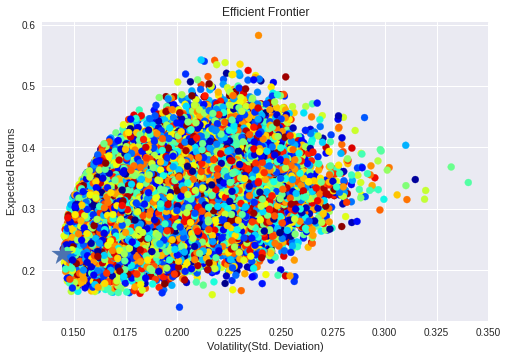

In [9]:
rets = np.sum( ret_daily.mean( ) * res['x'] ) * 250
vol = np.sqrt( res[ 'x' ].T @ covmat @ res[ 'x' ] )

p_volatility = np.array( p_volatility )
p_returns = np.array( p_returns )

colors = np.random.randint( 0, n_ports, n_ports )

import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use( 'seaborn' )
plt.scatter( p_volatility, p_returns, c=colors, marker='o', cmap=mpl.cm.jet )
plt.scatter( vol, rets, marker="*", s=500, alpha=1.0 )
plt.xlabel( 'Volatility(Std. Deviation)' )
plt.ylabel( 'Expected Returns' )
plt.title( 'Efficient Frontier' )
plt.show( )

In [10]:
from scipy.optimize import minimize

def obj_sharpe( weights, returns, covmat, rf ):
    ret = np.dot( weights, returns )
    vol = np.sqrt( np.dot( weights.T, np.dot( covmat, weights ) ) )
    return 1 /( ( ret-rf ) / np.sqrt( vol ) )

n_assets = len( tickers )
covmat = cov_daily*250

rf = 0.01

weights = np.ones( [n_assets] ) / n_assets

bnds = tuple( ( 0., 1.) for i in range( n_assets ) )

cons = ( { 'type': 'eq', 'fun': lambda w: np.sum(w) - 1} )

res = minimize( obj_sharpe, weights, ( ret_annual, covmat, rf ), method='SLSQP', bounds=bnds, constraints=cons )

In [11]:
print(res)

     fun: 0.7889483186071793
     jac: array([-0.15853537, -0.12536202, -0.21592821, -0.40681317,  0.08678222])
 message: 'Optimization terminated successfully.'
    nfev: 14
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([0.00000000e+00, 1.11022302e-16, 0.00000000e+00, 1.00000000e+00,
       1.11022302e-16])


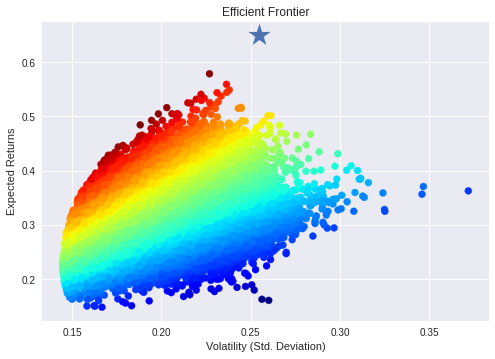

In [12]:
p_returns = [ ]
p_volatility = [ ]
p_weights = [ ]

n_assets = len( tickers )
n_ports = 30000

for s in range( n_ports ):
    wgt = np.random.random( n_assets )
    wgt /= np.sum( wgt )
    ret = np.dot( wgt, ret_annual )
    vol = np.sqrt( np.dot( wgt.T, np.dot(cov_annual, wgt ) ) )
    p_returns.append( ret )
    p_volatility.append( vol )
    p_weights.append( wgt )

rets = np.sum( ret_daily.mean( ) * res[ 'x' ] ) * 250
vol = np.sqrt( res[ 'x' ].T @ covmat @ res[ 'x' ] )
p_volatility = np.array( p_volatility )
p_returns = np.array( p_returns )

colors = p_returns/p_volatility
plt.style.use( 'seaborn' )
plt.scatter( p_volatility, p_returns, c=colors, marker='o', cmap=mpl.cm.jet )
plt.scatter( vol, rets, marker="*", s=500, alpha=1.0 )
plt.xlabel( 'Volatility (Std. Deviation)' )
plt.ylabel( 'Expected Returns' )
plt.title( 'Efficient Frontier' )
plt.show( )
 